In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

In [2]:
f = open('WhatsApp Chat with Aanya ❤️💫.txt', 'r', encoding='utf-8')

In [3]:
df = f.read()

In [4]:
pattern = '\d{2}\/\d{2}\/\d{2},\s\d{1,2}:\d{2}\s(?:am|pm)\s-\s'

In [5]:
msgs = re.split(pattern, df)[1:]

In [6]:
dates = re.findall(pattern, df)

In [7]:
df = pd.DataFrame({'messages': msgs, 'date': dates})

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %I:%M %p - ')

In [9]:
df.head()

,messages,date
0,Aanya ❤️💫: Tu pahucha?\n,2023-12-29 20:29:00
1,ANEKANT JAIN: Hmm\n,2023-12-29 20:59:00
2,ANEKANT JAIN: Ohhh sahi h\n,2023-12-29 21:03:00
3,ANEKANT JAIN: Me too khana khaya\n,2023-12-29 21:03:00
4,ANEKANT JAIN: 2 roti\n,2023-12-29 21:03:00


In [10]:
messages = []
users = []

def categories(str):
    pattern = '([\w\W]+?):\s'
    data = re.split(pattern, str)
    if len(data)>1:
        messages.append(data[2])
        users.append(data[1])
    else:
        users.append("Group Notification")
        messages.append(data[0])

df['messages'].apply(categories)
df['user'] = users
df['messages'] = messages

In [11]:
df.head()

,messages,date,user
0,Tu pahucha?\n,2023-12-29 20:29:00,Aanya ❤️💫
1,Hmm\n,2023-12-29 20:59:00,ANEKANT JAIN
2,Ohhh sahi h\n,2023-12-29 21:03:00,ANEKANT JAIN
3,Me too khana khaya\n,2023-12-29 21:03:00,ANEKANT JAIN
4,2 roti\n,2023-12-29 21:03:00,ANEKANT JAIN


<Axes: xlabel='user'>

C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


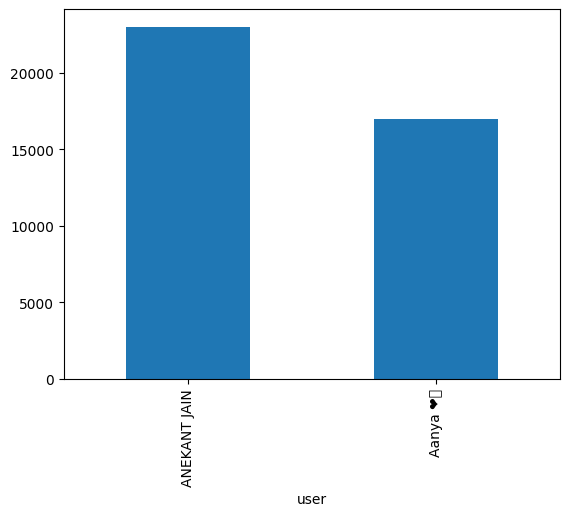

In [12]:
df['user'].value_counts().head(5).plot(kind='bar')

In [13]:
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [14]:
df.sample(10)

,messages,date,user,year,month_name,month,day_name,day,hour,minute
6844,Bta\n,2024-01-08 23:51:00,ANEKANT JAIN,2024,January,1,Monday,8,23,51
22439,Tension mat le\n,2024-01-23 20:55:00,Aanya ❤️💫,2024,January,1,Tuesday,23,20,55
354,Badhiya\n,2023-12-30 15:53:00,Aanya ❤️💫,2023,December,12,Saturday,30,15,53
12149,<Media omitted>\n,2024-01-14 14:49:00,ANEKANT JAIN,2024,January,1,Sunday,14,14,49
11491,Mujhe bhot cheeze allowed hai\n,2024-01-13 02:39:00,Aanya ❤️💫,2024,January,1,Saturday,13,2,39
35571,Hmm\n,2024-02-15 00:57:00,Aanya ❤️💫,2024,February,2,Thursday,15,0,57
32873,Kam hota hai\n,2024-02-12 14:59:00,Aanya ❤️💫,2024,February,2,Monday,12,14,59
37089,/\n,2024-02-20 00:16:00,ANEKANT JAIN,2024,February,2,Tuesday,20,0,16
38753,Ab ka\n,2024-02-22 13:11:00,ANEKANT JAIN,2024,February,2,Thursday,22,13,11
4915,Kyu\n,2024-01-05 00:46:00,ANEKANT JAIN,2024,January,1,Friday,5,0,46


In [15]:
user_df = pd.DataFrame({'users' : df['user'].unique()})

In [16]:
pickle.dump(user_df, open('users.pkl', 'wb'))

In [17]:
df.head()

,messages,date,user,year,month_name,month,day_name,day,hour,minute
0,Tu pahucha?\n,2023-12-29 20:29:00,Aanya ❤️💫,2023,December,12,Friday,29,20,29
1,Hmm\n,2023-12-29 20:59:00,ANEKANT JAIN,2023,December,12,Friday,29,20,59
2,Ohhh sahi h\n,2023-12-29 21:03:00,ANEKANT JAIN,2023,December,12,Friday,29,21,3
3,Me too khana khaya\n,2023-12-29 21:03:00,ANEKANT JAIN,2023,December,12,Friday,29,21,3
4,2 roti\n,2023-12-29 21:03:00,ANEKANT JAIN,2023,December,12,Friday,29,21,3


In [18]:
df['messages'] = df['messages'].apply(lambda x : x.lower())

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aneka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['words'] = df['messages'].apply(lambda str : nltk.word_tokenize(str))
df['words_count'] = df['words'].apply(lambda str : len(str))

In [24]:
df['words_count'].sum()

126349

In [1196]:
df['media'] = df['messages'].apply(lambda x : x.find('<media')) != -1

In [1197]:
from urlextract import URLExtract
extractor = URLExtract()

In [1198]:
links = []
def find_link(str):
    links.clear()
    links.extend(extractor.find_urls(str))
    return links

df['links'] = df['messages'].apply(find_link)

In [1199]:
from nltk.corpus import stopwords
import string

In [1200]:
def remove_stopwords(arr):
    list = []
    for i in arr:
        if i not in stopwords.words('english') and i not in string.punctuation:
            list.append(i)
    return list
    
df['tokens'] = df['words'].apply(remove_stopwords)

In [1201]:
x = df['user'].value_counts().head()

Most busy user

In [1202]:
name = x.index
value = x.values

C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


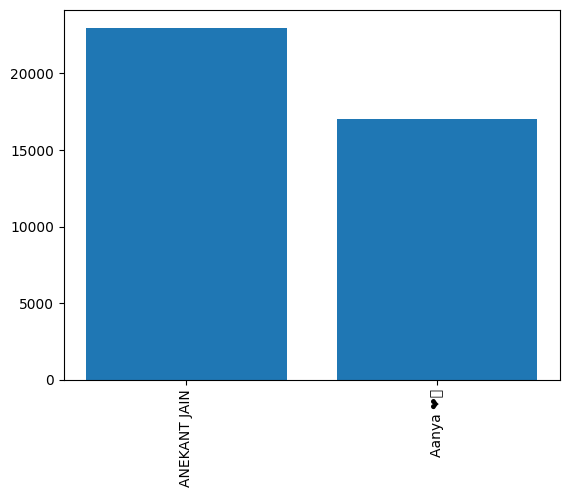

In [1203]:
plt.bar(name, value)
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='count'>

C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


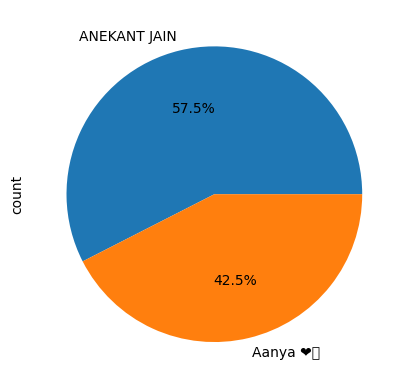

In [1204]:
(((df['user'].value_counts().head()) / df.shape[0])*100).plot(kind='pie', autopct='%1.1f%%')

In [1205]:
from collections import Counter

In [1206]:
list = []
def temp(arr, user, links, media):
    if user != 'Group Notification' and media == False and len(links)==0:
        for i in arr:
            list.append(i)

df.apply(lambda df : temp(df['tokens'], df['user'], df['links'], df['media']), 1)

0        None
1        None
2        None
3        None
4        None
         ... 
39994    None
39995    None
39996    None
39997    None
39998    None
Length: 39999, dtype: object

In [1207]:
top_msg_df = pd.DataFrame(Counter(list).most_common(40))

In [1208]:
top_msg_df[0].values

array(['h', 'hai', 'hmm', 'nahi', 'kya', 'ni', 'bhi', 'hi', 'ho', 'se',
       'tu', 'na', 'ke', 'ki', 'tha', 'hu', 'vo', 'ka', 'phir', 'baat',
       'mujhe', 'kuch', 'ye', 'thik', 'bhai', 'pe', 'rha', 'kyu', 'kar',
       'bas', 'accha', 'abhi', 'aur', 'mene', 'ko', 'ek', 'ab', 'bol',
       'thi', 'tujhe'], dtype=object)

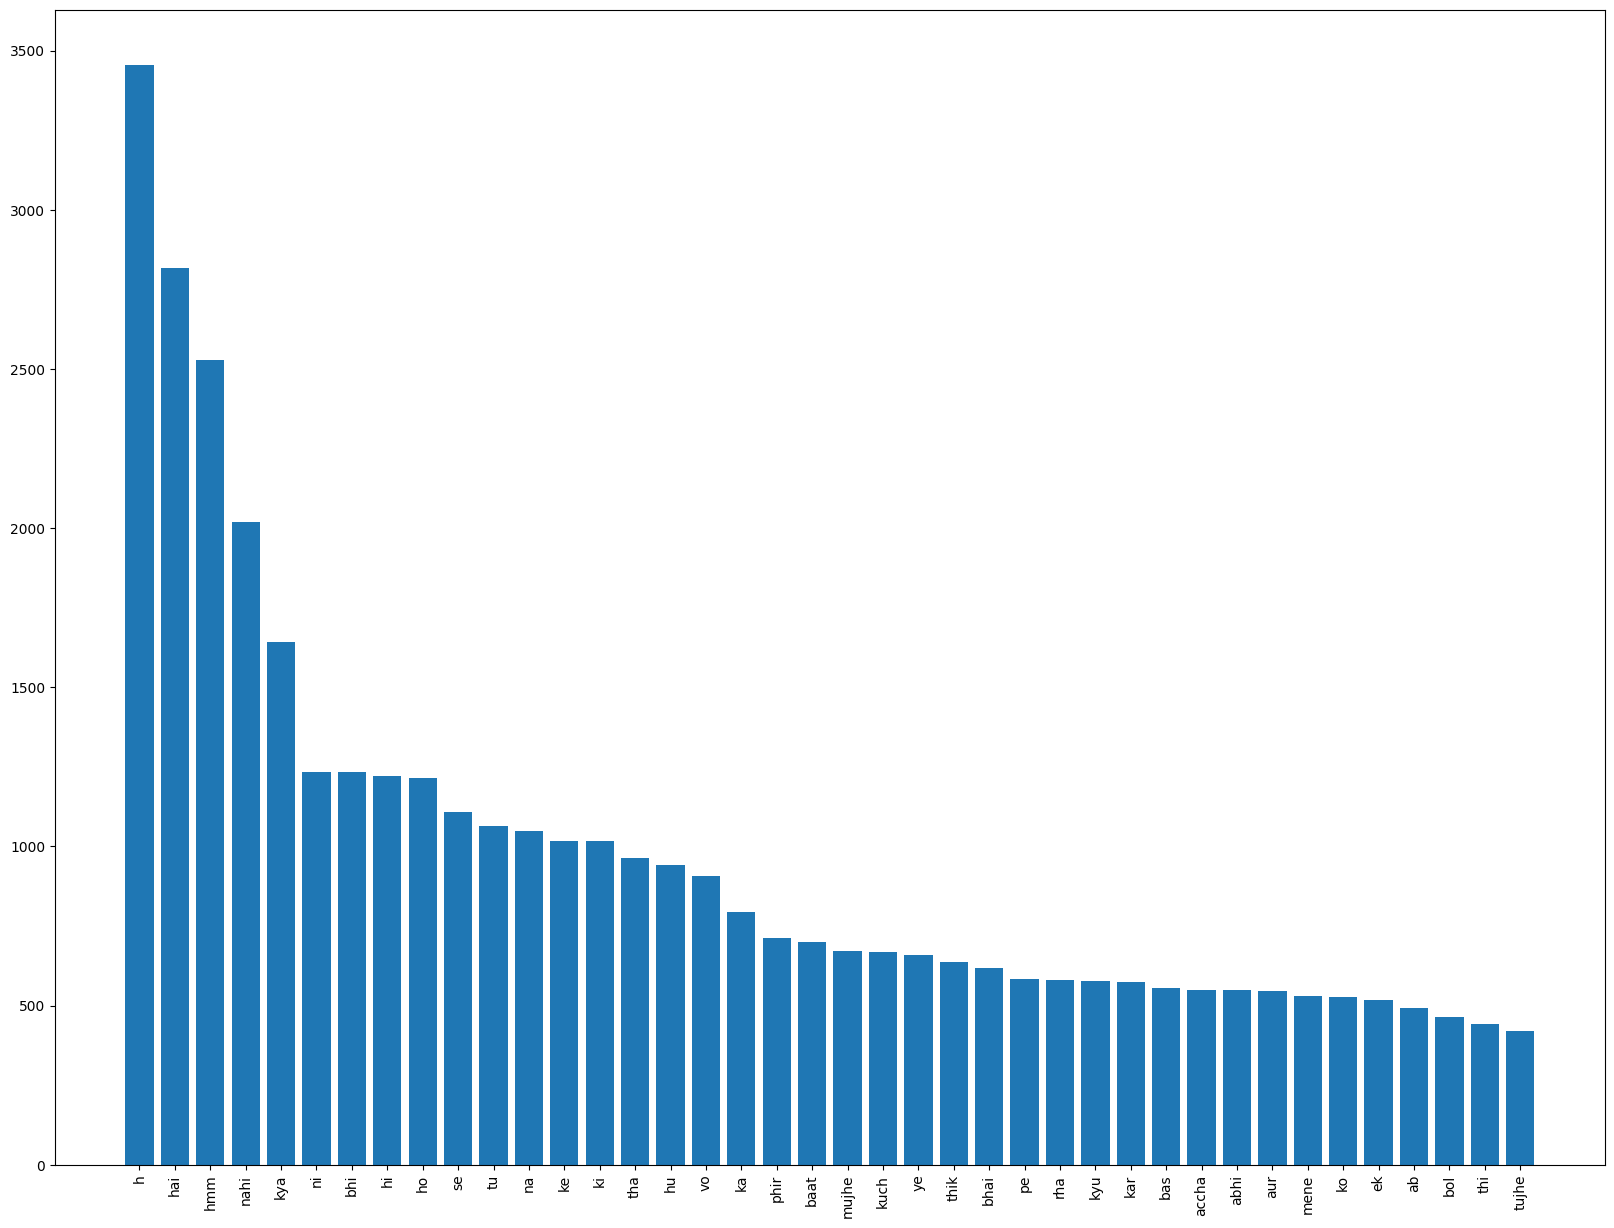

In [1209]:
plt.figure(figsize=(20,15))
plt.bar(top_msg_df[0], top_msg_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [1210]:
emojis = []

def is_emoji(character):
    # Emojis typically fall within this Unicode range
    return 0x1F600 <= ord(character) <= 0x1F64F or \
           0x1F300 <= ord(character) <= 0x1F5FF or \
           0x1F680 <= ord(character) <= 0x1F6FF or \
           0x1F700 <= ord(character) <= 0x1F77F or \
           0x1F780 <= ord(character) <= 0x1F7FF or \
           0x1F800 <= ord(character) <= 0x1F8FF or \
           0x1F900 <= ord(character) <= 0x1F9FF or \
           0x1FA00 <= ord(character) <= 0x1FA6F or \
           0x1FA70 <= ord(character) <= 0x1FAFF or \
           0x2600 <= ord(character) <= 0x26FF or \
           0x2700 <= ord(character) <= 0x27BF or \
           0xFE00 <= ord(character) <= 0xFE0F or \
           0x1F900 <= ord(character) <= 0x1F9FF or \
           0x1F9E0 <= ord(character) <= 0x1F9FF or \
           0x200D <= ord(character) <= 0x200D or \
           0x20E3 <= ord(character) <= 0x20E3

for msg in df['messages']:
    emojis.extend(word for word in msg if any(is_emoji(c) for c in word))

In [1211]:
top_emojis = pd.DataFrame(Counter(emojis).most_common(10))

In [1212]:
top_emojis[0].values

array(['😂', '🥲', '🤭', '🏻', '😑', '🥺', '🙏', '😚', '️', '😒'], dtype=object)

C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129325 (\N{SMILING FACE WITH SMILING EYES AND HAND COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Aneka\AppData\Local\Packages\PythonSoftwareFoundation.Python.

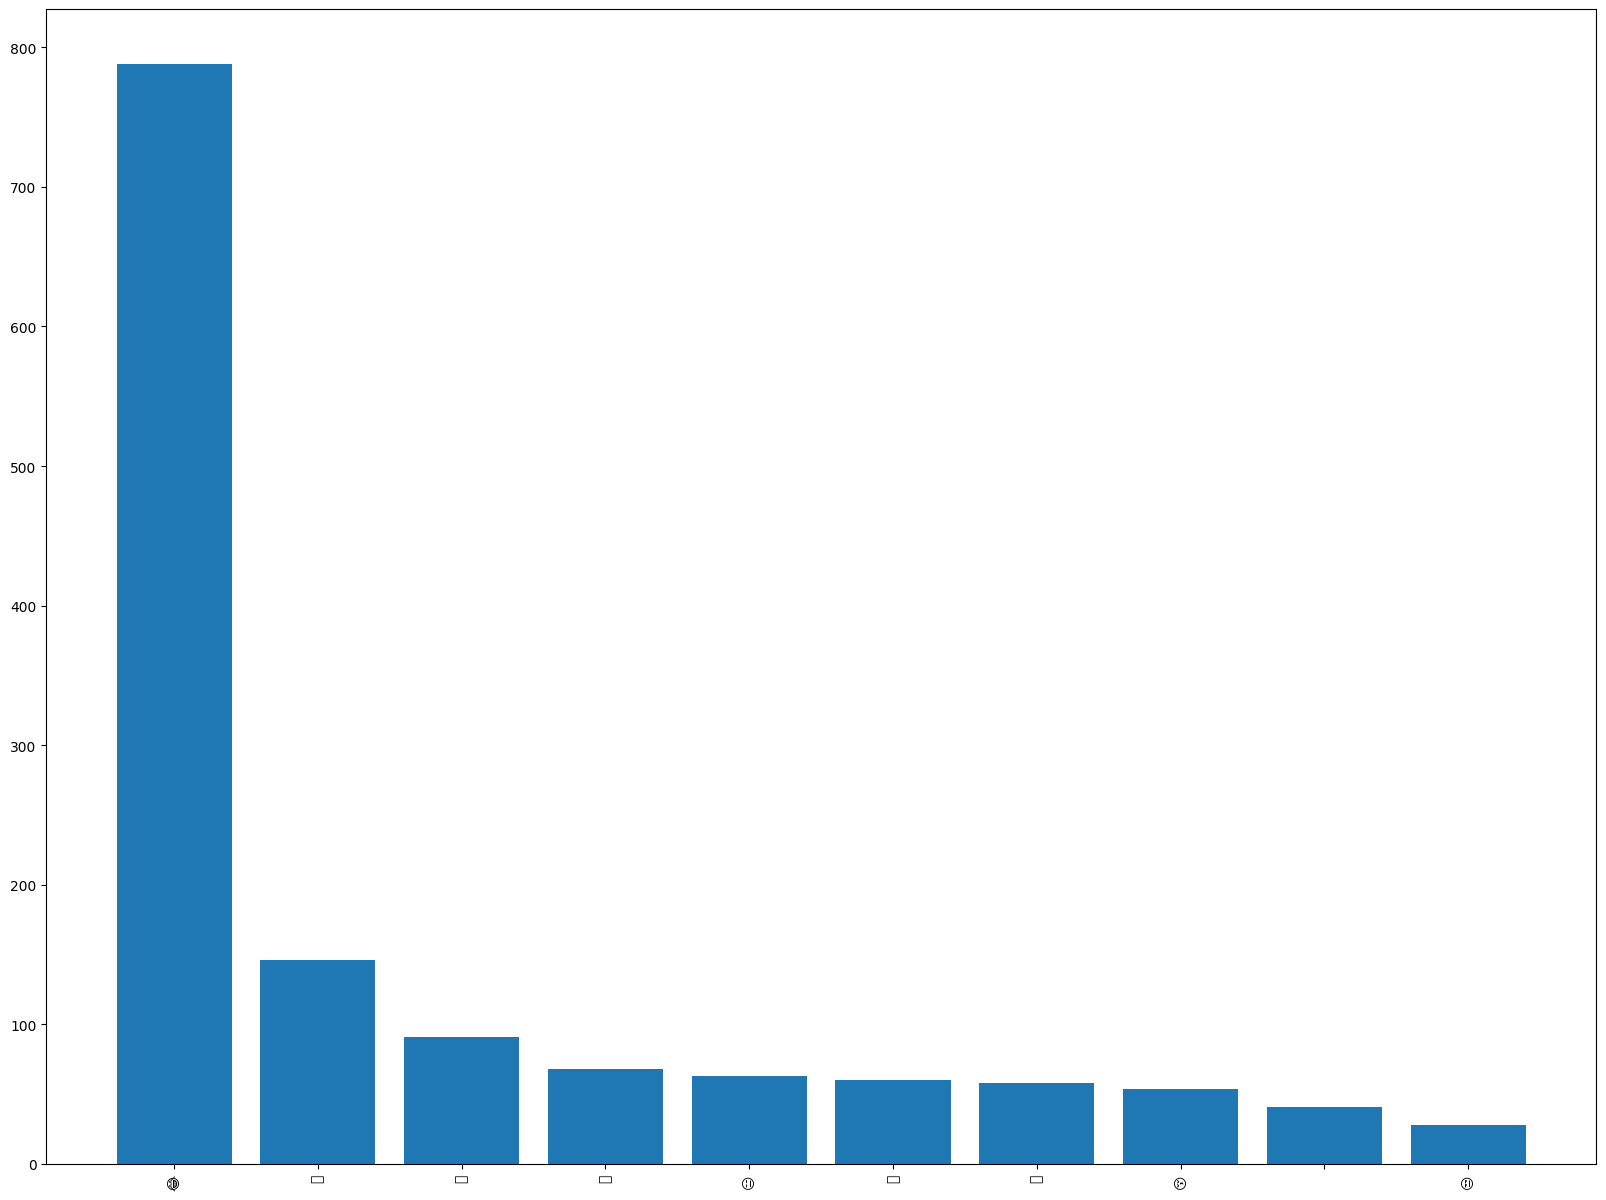

In [1213]:
plt.figure(figsize=(20,15))
plt.bar(top_emojis[0], top_emojis[1])
plt.xticks(rotation='vertical')
plt.show()

In [1214]:
timeline = df.groupby(['year','month','month_name']).count()['messages'].reset_index()

In [1215]:
time = []

In [1216]:
for i in range(timeline.shape[0]):
    time.append(timeline['month_name'][i] + "-" + str(timeline['year'][i]))

In [1217]:
timeline['time'] = time

In [1218]:
timeline.head()

,year,month,month_name,messages,time
0,2023,12,December,1328,December-2023
1,2024,1,January,25101,January-2024
2,2024,2,February,13570,February-2024


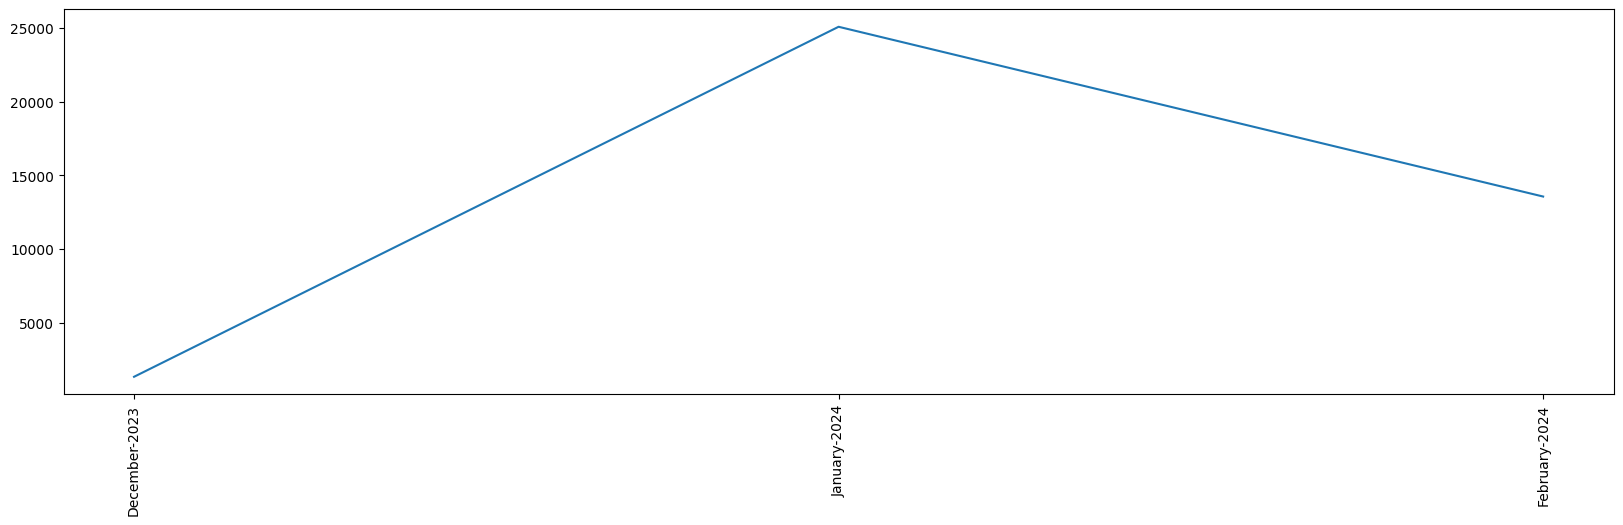

In [1219]:
plt.figure(figsize=(20,5))
plt.plot(timeline['time'], timeline['messages'])
plt.xticks(rotation='vertical')
plt.show()

In [1220]:
df['only_date'] = df['date'].dt.date

In [1221]:
daily_timeline = df.groupby('only_date').count()['messages'].reset_index()

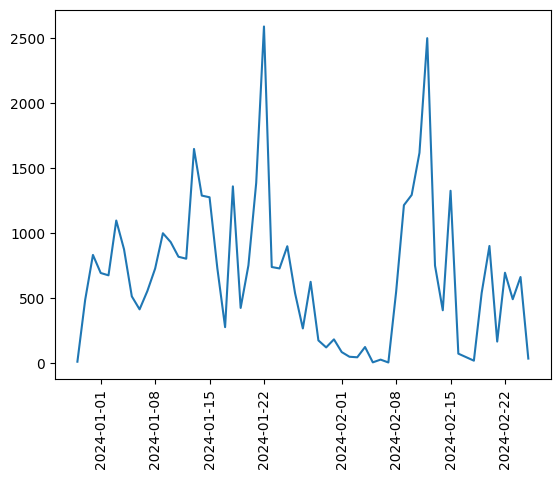

In [1222]:
plt.plot(daily_timeline['only_date'], daily_timeline['messages'])
plt.xticks(rotation='vertical')
plt.show()

In [1223]:
day_timeline = df.groupby('day_name').count()['messages'].reset_index()

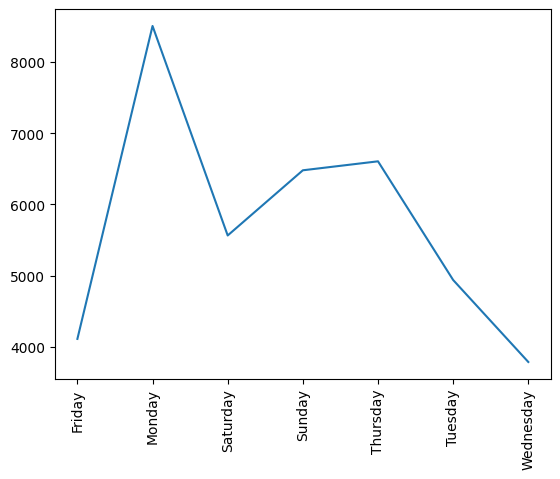

In [1224]:
plt.plot(day_timeline['day_name'], day_timeline['messages'])
plt.xticks(rotation='vertical')
plt.show()

In [1225]:
monthly_timeline = df.groupby('month_name').count()['messages'].reset_index()

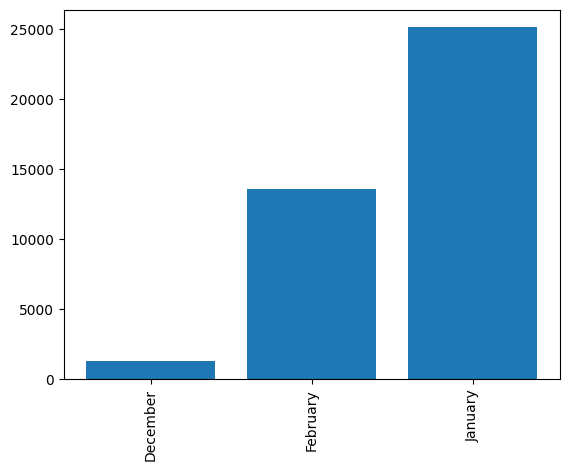

In [1226]:
plt.bar(monthly_timeline['month_name'], monthly_timeline['messages'])
plt.xticks(rotation='vertical')
plt.show()